In [2]:
from google.colab import files

uploaded = files.upload()

Saving data2.txt to data2.txt


In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
file=open('data2.txt','r')

In [5]:
data=file.read()
data

'1.0000000e+00   2.0000000e+00   1.0000000e+00   2.0000000e+00   2.0000000e+00   2.0000000e+00   2.0000000e+00   2.0000000e+00   1.0000000e+00   1.0000000e+00   2.0000000e+00   2.0000000e+00   1.0000000e+00   2.0000000e+00   2.0000000e+00   2.0000000e+00   2.0000000e+00   2.0000000e+00   1.0000000e+00   1.0000000e+00   2.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   2.0000000e+00   1.0000000e+00   1.0000000e+00   2.0000000e+00   1.0000000e+00   2.0000000e+00   2.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   1.0000000e+00   2.0000000e+00   2.0000000e+00   2.0000000e+00   2.0000000e+00   2.0000000e+00   1.0000000e+00   1.00000

<function matplotlib.pyplot.show>

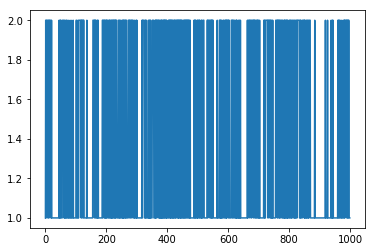

In [68]:
num=np.array([int(float(x)) for x in data.split()])
plt.plot(num)
plt.show

#Modeling 

Unknown parameters (Pa,Pb,epa,epb,initial)

$X_i$ = 1, 1, 2, 2, 1, ...


$Z_i$ = ?, ?, ?, ?, ?, ... (hidden)


To model $P(X|\theta)$, maybe try to model $P(X, Z| \theta) = P( X| Z, \theta) P( Z| \theta )$


#EM By solving the MLE

finding the best likely $Z$ for given $X$

In [7]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving HMM.png to HMM.png


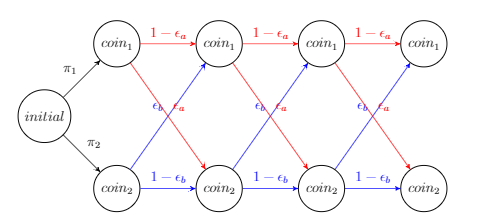

In [8]:
Image("HMM.png", width=600)

Althought there are only finite states in here, brutal force may not work as data size getting bigger.
To overcome such inefficient method, we need to propose a new one. Notice that the probability of coin_1/coin_2 of  n-th data is just depend on the previous probability coin_1/coin_2 of (n-1)-th data. Instead of comparing 2^N possibility, we will store the probabiltiy of each step. By chosing the bigger probability in each step, we will find the most likely $Z$ given $X$.

#Update parameter

As long as we find the most likely $Z$ given $X$, we can update our parameter. 

$\epsilon_a=\frac{\#(coin_1\text{ change to }coin_2)}{\#(coin_1)}$

$\epsilon_b=\frac{\#(coin_2\text{ change to }coin_1)}{\#(coin_2)}$

$Pa=\frac{\#(coin_1 \text{ flipped to } 1)}{\# (coin_1)}$

$Pb=\frac{\#(coin_2 \text{ flipped to } 1)}{\#(coin_1)}$

The updating above can be viewed as indicator function, the choice are only \{0,1\}. For such restriction, the updata may not work well. Is there any a precise method to updata?


#EM Baum-Welch algorithm

$\require{cancel}$
\begin{align}
P(S_t=q_i,S_{t+1}=q_j|\theta, O) &=\frac{P(S_t=q_i,S_{t+1}=q_j,O|\theta)}{\underbrace{P(O|\theta)}_{\text{correction term}}}\\
\end{align}
$$\text{Thus,we may just consider the numerator term}$$
\begin{align}
P(S_t=q_i,S_{t+1}=q_j,O|\theta)&=P(S_{t+1}=q_j,O_{t+1}\dots O_T|\cancel{O_1\dots O_t}, S_t=q_i)* P(O_1\dots O_t,S_t=q_i|\theta)\\
&=P(O_{t+1}\dots O_T|\cancel{S_t=q_i},S_{t+1}=q_j,\theta)*P(S_{t+1}=q_j|S_t=q_i,\theta)*P(O_1\dots O_t,S_t=q_i|\theta)\\
&=\underbrace{P(O_{t+2} \dots O_t | S_{t+1}=q_j,~\theta)}_{\beta_i(t+1)}*P(O_{t+1}|S_{t+1}=q_j)* P(S_{t+1}=q_j | S_{t}= q_i,\theta)*\underbrace{P(S_t=q_j, O_1 \dots O_t | \theta)}_{\alpha_i(t)}
\end{align}

$\require{cancel}$
$P(X_t=i,O1\dots O_T|\theta)=P(O_{t+1}\dots O_T|X_t=i,\cancel{O_1\dots O_t})*P(O_1\dots O_t,X_t=i| \theta)=\alpha_i(t)*\beta_i(t)$

Set initial value

$Pa$ = probability of flipping 1 while tossing coin_1

$Pb$ = probability of flippint 1 while tossing coin_2

$\epsilon_a$ = probabilitiy of changing to coin_2 from coin_1

$\epsilon_b$ = probability of changing to coin_1 from coin_2

In [0]:
Pa=0.5
Pb=0.5
epa=0.2
epb=0.2
init=1/5

Construct forward and backward data

In [0]:
backward = np.zeros([2,1000])
forward  = np.zeros([2,1000])

$\require{cancel}$
\begin{align}
\beta_j(t)& =P(O_{t+1}\dots O_T | S_t=j,\theta)\\
                & =\displaystyle\sum_k P(O_{t+1}\dots O_t,S_{t+1}=k |  S_t=j , \theta)\\
                & = \sum_k P(O_{t+1}\dots O_T| \cancel{S_t=j},S_{t+1}=k,\theta)*P(S_{t+1}=k|S_t=j,\theta)\\
                & =\sum_k P(O_{t+1}|S_{t+1}=k,\theta,\cancel{O_{t+2}\dots O_T})*\underbrace{P(O_{t+2}\dots O_T| S_{t+1}=k,\theta)}_{backward}*P(S_{t+1}=k|S_t=j,\theta)
\end{align}

In [0]:
#backward

temp_A=1
temp_B=1
for i in range (1000):
  (backward[0][999-i],backward[1][999-i])=(temp_A,temp_B)
  #P(data[t+1]|coin_1)*P(coin_1|state_y)*backward(t+1,coin_1)+P(data[t+1]|coin_2)*P(coin_2|state_y)*backward(t+1,coin_2)
  
  x=Pa**(num[999-i]==1)*(1-Pa)**(num[999-i]==2)*(1-epa)*temp_A+Pb**(num[999-i]==1)*(1-Pb)**(num[999-i]==2)*epa*temp_B
  y=Pa**(num[999-i]==1)*(1-Pa)**(num[999-i]==2)*epb*temp_A+Pb**(num[999-i]==1)*(1-Pb)**(num[999-i]==2)*(1-epb)*temp_B
  temp_A=x
  temp_B=y

  
#idea  
#def backward (t,state_y,data,temp_A,temp_B):
  #if (t==999):
    #return 1
  #elif(state_y=='A') :
    #return Pa**(data[t+1]==1)*(1-Pa)**(data[t+1]==2)*(1-epa)*backward(t+1,'A',data)+Pb**(data[t+1]==1)*(1-Pb)**(data[t+1]==2)*epa*backward(t+1,'B',data)
  #else :
    #return Pa**(data[t+1]==1)*(1-Pa)**(data[t+1]==2)*epb*backward(t+1,'A',data)+Pb**(data[t+1]==1)*(1-Pb)**(data[t+1]==2)*(1-epb)*backward(t+1,'B',data)

In [24]:
backward

array([[1.86652724e-301, 3.73305447e-301, 7.46610895e-301, ...,
        2.50000000e-001, 5.00000000e-001, 1.00000000e+000],
       [1.86652724e-301, 3.73305447e-301, 7.46610895e-301, ...,
        2.50000000e-001, 5.00000000e-001, 1.00000000e+000]])

$\require{cancel}$
\begin{align}
\alpha_i(t) &=P(S_t=i,O_1\dots O_t| \theta)\\
                   &=\displaystyle\sum_k P(S_t=i,O_1\dots O_t, S_{t-1}=k| \theta)\\
                   &=\sum_k P(S_t=i, O_t| \cancel{O_1\dots O_{t-1}},S_{t-1}=k,\theta)*P(O_1 \dots O_{t-1},S_{t-1}=k|\theta)\\
                   &=\sum_k P(O_t| S_t=i)*P(S_t=i|S_{t-1}=k)*\underbrace{P(O_1\dots O_{t-1},S_{t-1}=k|\theta  )}_{forward}
\end{align}

In [0]:
#forward

temp_A=init*Pa**(num[0]==1)*(1-Pa)**(num[0]==2)
temp_B=1-init*Pb**(num[0]==1)*(1-Pb)**(num[0]==2)
for i in range (999):
  (forward[0][i],forward[1][i])=(temp_A,temp_B)
  #(P(data[t]|state_x)*P(state_x|coin_1)*forward(t-1,coin_1)+P(data[t]|state_x)*P(state_x|coin_2)*forward(t-1,coin_2)#
  x=Pa**(num[i+1]==1)*(1-Pa)**(num[i+1]==2)*(1-epa)*temp_A+Pa**(num[i+1]==1)*(1-Pa)**(num[i+1]==2)*epb*temp_B
  y=Pb**(num[i+1]==1)*(1-Pb)**(num[i+1]==2)*epa*temp_A+Pb**(num[i+1]==1)*(1-Pb)**(num[i+1]==2)*(1-epb)*temp_B
  temp_A=x
  temp_B=y
#idea
#def forward (t,state_x,data):
  #if (t==0):
     #return 1
  #elif(state_x=='A') :
      #return Pa**(data[t]==1)*(1-Pa)**(data[t]==2)*(1-epa)*forward(t-1,'A',data)+Pa**(data[t]==1)*(1-Pa)**(data[t]==2)*epb*forward(t-1,'B',data)
  #else :
      #return Pb**(data[t]==1)*(1-Pb)**(data[t]==2)*epa*forward(t-1,'A',data)+Pb**(data[t]==1)*(1-Pb)**(data[t]==2)*(1-epb)*forward(t-1,'B',data)


In [15]:
forward

array([[1.00000000e-001, 1.30000000e-001, 8.90000000e-002, ...,
        3.73305447e-301, 1.86652724e-301, 0.00000000e+000],
       [9.00000000e-001, 3.70000000e-001, 1.61000000e-001, ...,
        3.73305447e-301, 1.86652724e-301, 0.00000000e+000]])

In [0]:
# P(S_t = i, S_{t+1} = j | parameter,observation)
def P_ij(t,state_x,state_y,data):
  if (state_x==0):
    return forward[state_x][t]*backward[state_y][t+1]*(Pa**(data[t+1]==1)*(1-Pa)**(data[t+1]==2)*(1-epa))**(state_y==0)*(Pb**(data[t+1]==1)*(1-Pb)**(data[t+1]==2)*epa)**(state_y==1)
  else:
    return forward[state_x][t]*backward[state_y][t+1]*(Pa**(data[t+1]==1)*(1-Pa)**(data[t+1]==2)*epb)**(state_y==0)*(Pb**(data[t+1]==1)*(1-Pb)**(data[t+1]==2)*(1-epb))**(state_y==1)

In [17]:
P_ij(3,1,1,num)

8.756252574244604e-302

#Update parameter 

$\text{Define}$ $\gamma_i(t)=P(X_t=i|O,\theta)=\displaystyle\frac{\alpha_i(t)*\beta_i(t)}{\displaystyle\sum_k \alpha_k(t)*\beta_k(t)}$


$\epsilon_a=\frac{\displaystyle\sum_k P_{ij} (k,A,B)}{ \displaystyle\sum_k P_{ij} (k,A,B)+\sum_k P_{ij}(k,A,A)}$

$\epsilon_b=\frac{\displaystyle\sum_k P_{ij} (k,B,A)}{ \displaystyle\sum_k P_{ij} (k,B,A)+\sum_k P_{ij}(k,B,B)}$

$\left.
\begin{array}{ll}
Pa=\displaystyle \sum_k P_{ij}(k,A,B)+P_{ij}(k,A,A)\\
Pb=\displaystyle \sum_k P_{ij}(k,B,A)+P_{ij}(k,B,B)
\end{array}\right\}
=\frac{\displaystyle\sum_{t=1}^T 1_{O_t=1}\gamma_i(t)}{\displaystyle\sum_{t=1}^T \gamma_i(t)}$

init=$P(X_1=i|O,\theta)=\gamma_i(1)$

\begin{align}
\end{align}

In [48]:
gamma=np.multiply(forward,backward)
Ind_1=np.where(num==1,num,0)
Ind_2=np.where(num==2,num,0)
tol=

while res<tol:
  epa=/np.sum(gamma[:,0:999],axis=1)[0]
  epb=/np.sum(gamma[:,0:999],axis=1)[1]
  Pa=np.dot(Ind_1,gamma[0,:])/np.sum(gamma,axis=1)[0]
  Pb=np.dot(Ind_2,gamma[1,:])/np.sum(gamma,axis=1)[1]
  init=gamma[0][0]/np.sum(gamma,axis=0)[0]

SyntaxError: ignored

In [46]:
test=np.multiply(forward,backward)
test

array([[1.86652724e-302, 4.85297082e-302, 6.64483696e-302, ...,
        9.33263619e-302, 9.33263619e-302, 9.33263619e-302],
       [1.67987451e-301, 1.38123016e-301, 1.20204354e-301, ...,
        9.33263619e-302, 9.33263619e-302, 9.33263619e-302]])

In [52]:
gamma=np.multiply(forward,backward)
np.sum(gamma,axis=1)[0]

9.313970912662158e-299

In [0]:
gamma=np.multiply(forward,backward)
Ind_1=np.where(num==1,num,0)
Ind_2=np.where(num==2,num,0)

In [77]:
gamma

array([[1.86652724e-302, 4.85297082e-302, 6.64483696e-302, ...,
        9.33263619e-302, 9.33263619e-302, 9.33263619e-302],
       [1.67987451e-301, 1.38123016e-301, 1.20204354e-301, ...,
        9.33263619e-302, 9.33263619e-302, 9.33263619e-302]])

In [0]:
transist=np.array([[np.multiply(forward[0,0:999],backward[0,1:1000]),
                 np.multiply(forward[0,0:999],backward[1,1:1000])],
                 [np.multiply(forward[1,0:999],backward[0,1:1000]),
                 np.multiply(forward[1,0:999],backward[1,1:1000])]])

In [0]:
np.multiply(forward[0,0:999],backward[1,1:1000])

In [112]:
np.shape(transist)

(2, 2, 999)